In [52]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Objective

1) To predict whether a liability customer will buy a personal loan or not.
2) Which variables are most significant.
3) Which segment of customers should be targeted more.  

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



## Business Insights

* Education, Income and Family are the most important features to see if someone becomes a borrower
* Experience, Zip Code, Securities Account, Online and CCd make almost no difference
* Age makes a very small difference
* Higher Education, Income and Family should lead to higher chance of a customer taking out a loan. 


In [2]:
data = pd.read_csv("Loan_Modelling.csv")
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [3]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
df = data  # copy data into a new data frame so as not to inadvertantly change the orginal data set

<IPython.core.display.Javascript object>

In [5]:
df.info()  # review the basic info on the data set, looks like we have several objects lets see if we can reclaim some memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [6]:
df.describe().T  #   Lets get a look at the numerical data stats

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

## Data Preprocessing & Feature Engineering

In [8]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [9]:
df.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

Lets look for missing values

In [11]:
# let's check again for missing values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

No missing values found that need treatment

In [12]:
# Let's check if the units correspond to the fuel types
df.groupby(by="Age").size()

Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
31    125
32    120
33    120
34    134
35    151
36    107
37    106
38    115
39    133
40    125
41    136
42    126
43    149
44    121
45    127
46    127
47    113
48    118
49    115
50    138
51    129
52    145
53    112
54    143
55    125
56    135
57    132
58    143
59    132
60    127
61    122
62    123
63    108
64     78
65     80
66     24
67     12
dtype: int64

<IPython.core.display.Javascript object>

### We have some outliers or maybe just bad data in Expeirence Lets dig more into those. 

In [13]:
# Let's check if the units correspond to the fuel types
df.groupby(by="Experience").size()

Experience
-3       4
-2      15
-1      33
 0      66
 1      74
 2      85
 3     129
 4     113
 5     146
 6     119
 7     121
 8     119
 9     147
 10    118
 11    116
 12    102
 13    117
 14    127
 15    119
 16    127
 17    125
 18    137
 19    135
 20    148
 21    113
 22    124
 23    144
 24    131
 25    142
 26    134
 27    125
 28    138
 29    124
 30    126
 31    104
 32    154
 33    117
 34    125
 35    143
 36    114
 37    116
 38     88
 39     85
 40     57
 41     43
 42      8
 43      3
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
df.loc[df["Experience"] == -3]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2618,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [15]:
df.loc[df["Experience"] == -2]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1
793,24,-2,150,94720,2,2.00,1,0,0,0,0,1,0
889,24,-2,82,91103,2,1.60,3,0,0,0,0,1,1
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1


<IPython.core.display.Javascript object>

In [16]:
df.loc[df["Experience"] == -1]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
649,25,-1,82,92677,4,2.10,3,0,0,0,0,1,0
670,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0
686,24,-1,38,92612,4,0.60,2,0,0,0,0,1,0


<IPython.core.display.Javascript object>

## We have roughly 1% of the data set has bad numbers in experience, I have no way to identify how to correct this, as this is just 1% of the data set im going to delete these lines

In [17]:
count_columns = ["Age", "Experience", "Income", "Family", "Education"]
for i in count_columns:
    print(data[i].value_counts())
    print("*" * 50)

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2

<IPython.core.display.Javascript object>

In [18]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [19]:
df.drop(df[df.Experience < 0].index, inplace=True)

<IPython.core.display.Javascript object>

In [20]:
# Let's check if the units correspond to the fuel types
df.groupby(by="Experience").size()

Experience
0      66
1      74
2      85
3     129
4     113
5     146
6     119
7     121
8     119
9     147
10    118
11    116
12    102
13    117
14    127
15    119
16    127
17    125
18    137
19    135
20    148
21    113
22    124
23    144
24    131
25    142
26    134
27    125
28    138
29    124
30    126
31    104
32    154
33    117
34    125
35    143
36    114
37    116
38     88
39     85
40     57
41     43
42      8
43      3
dtype: int64

<IPython.core.display.Javascript object>

In [21]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

## EDA

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
ZIPCode,4948.0,93168.503436,1761.076366,90005.0,91911.00,93437.0,94608.0,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0
Personal_Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.0,1.0
Securities_Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.0,1.0


<IPython.core.display.Javascript object>

Thoughts:  
 1) Age seems to be pretty evenly distributed
 2) the bottom quartet of experience lines up very evenly Age imo

In [23]:
# checking extreme values in Income
df.sort_values(by=["Income"], ascending=False).head(20)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
677,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
4225,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
3804,47,22,203,95842,2,8.80,1,0,0,0,0,1,0
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0


<IPython.core.display.Javascript object>

Income has a high end but its got a fairly consistent if low numer run up the high end. I do believe this is an outlier on the high end. Lets look low

In [24]:
# checking extreme values in Income
df.sort_values(by=["Income"], ascending=True).head(20)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4223,53,26,8,94709,1,0.50,2,0,0,0,0,0,1
4706,60,36,8,92626,2,1.00,1,0,0,0,0,0,0
4507,26,1,8,94550,2,0.90,3,0,0,0,0,0,1
2591,31,7,8,95131,4,0.70,2,0,0,0,0,0,0
939,56,32,8,93943,2,0.30,1,0,0,0,0,1,1
291,43,16,8,90089,3,0.67,2,88,0,0,0,1,0
4094,53,23,8,95616,4,0.40,3,0,0,1,0,1,0
1000,59,35,8,92691,4,0.70,1,91,0,1,0,0,0
2248,63,37,8,94618,1,0.80,2,97,0,0,0,1,0
2509,36,11,8,93401,4,0.20,3,81,0,0,0,0,1


<IPython.core.display.Javascript object>

With multple entires for the low end and the analysis earlier showing a consistent run down to 8 i think this is safe to say is not an outlier either

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

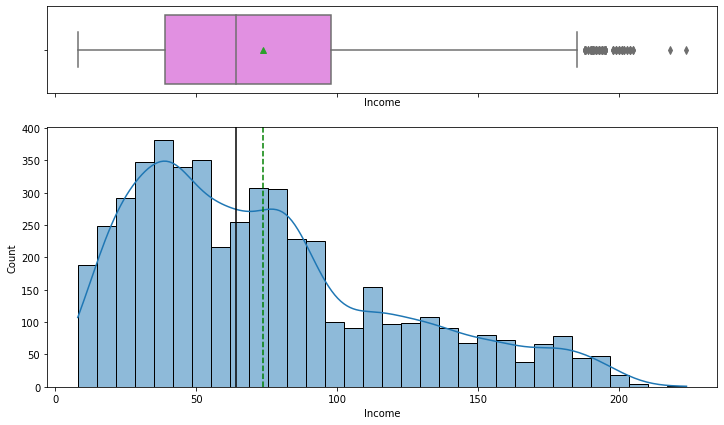

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "Income", kde=True)

Income is a bit skewed to the left lets look at what a log does for this

In [27]:
# Creating a new column with the transformed variable
df["Income_log"] = np.log(df["Income"])

<IPython.core.display.Javascript object>

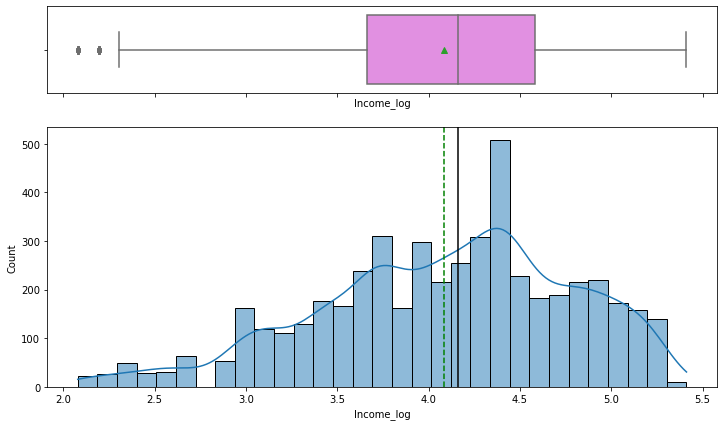

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "Income_log", kde=True)

This does give us a bit of a more normal distribution but it also skews to the rright quite a bit now

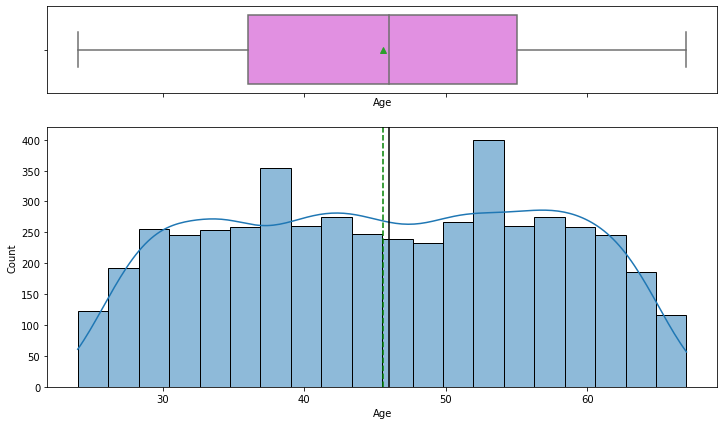

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "Age", kde=True)

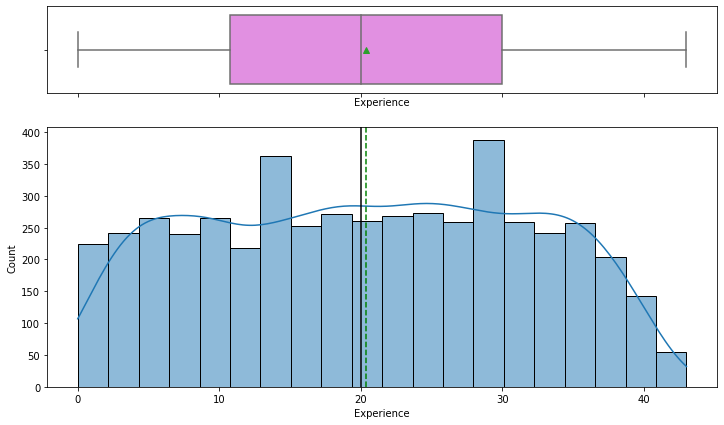

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "Experience", kde=True)

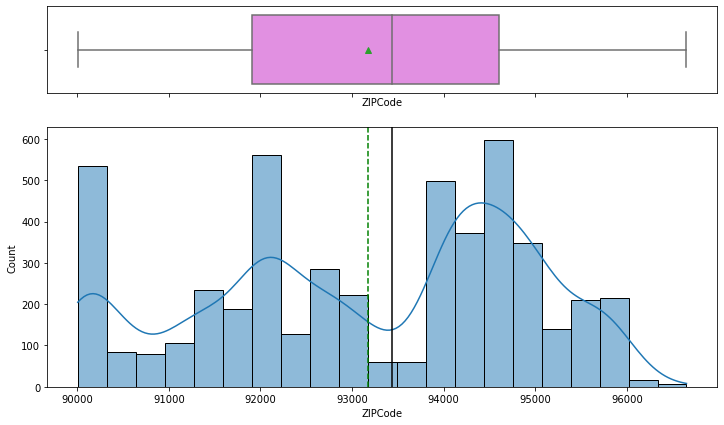

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "ZIPCode", kde=True)

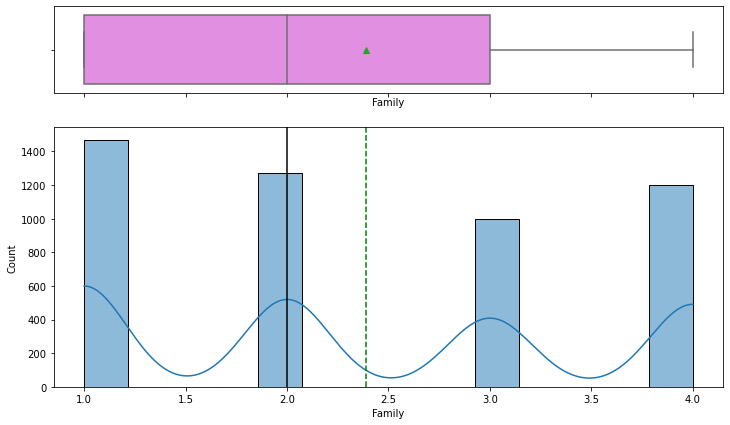

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "Family", kde=True)

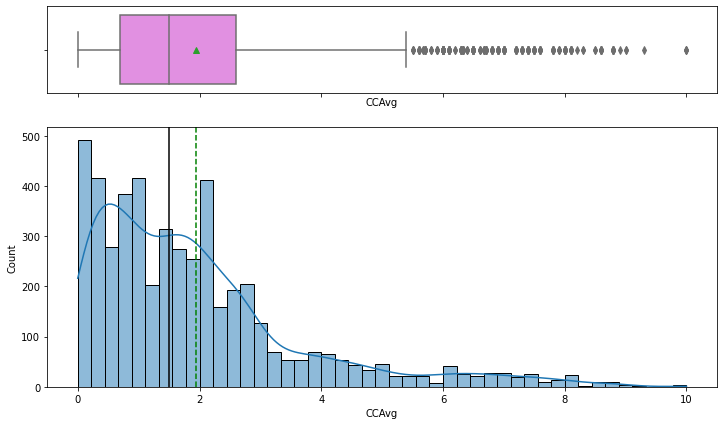

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "CCAvg", kde=True)

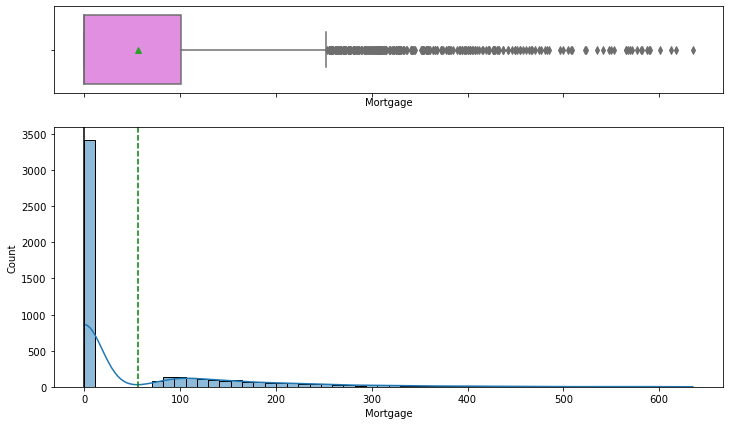

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "Mortgage", kde=True)

Nearly 75% of the data set doesnt have a mortgage. This might not be a good variable to use for this use case. Will consider cutting it out later even thought it might be a good data point for some things

In [35]:
df.groupby(by="Mortgage").size()

Mortgage
0      3422
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Length: 347, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

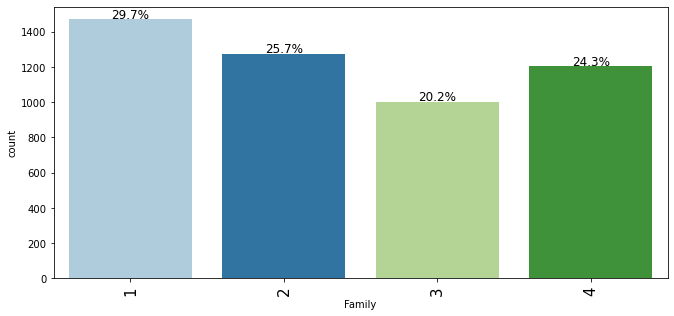

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "Family", perc=True, n=10)

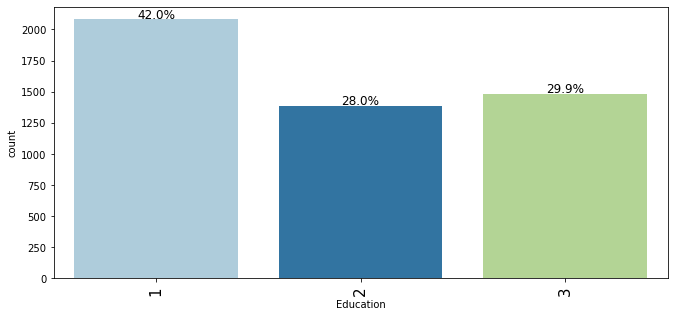

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "Education", perc=True, n=10)

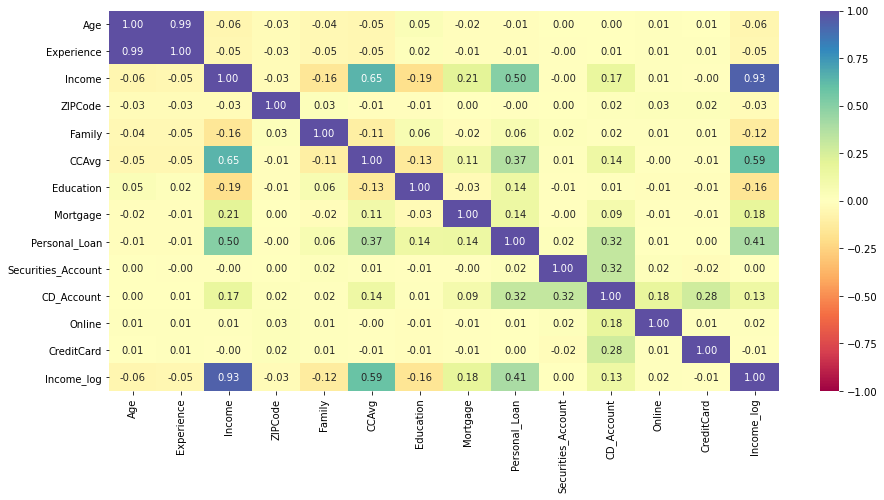

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There are not a ton of interesting correslations heres, Income to CCAvg & Personal Loan is the closest. We know the point of the campaign to target everyone not in the Personal Load catagory so that one will not help. We can see mortgage does not seem to have a high correlation to almost anything. See as it has 75% 0 values im going to create a parallel data set to explore without it

In [40]:
df1 = df
df1.drop("Mortgage", axis=1, inplace=True)

<IPython.core.display.Javascript object>

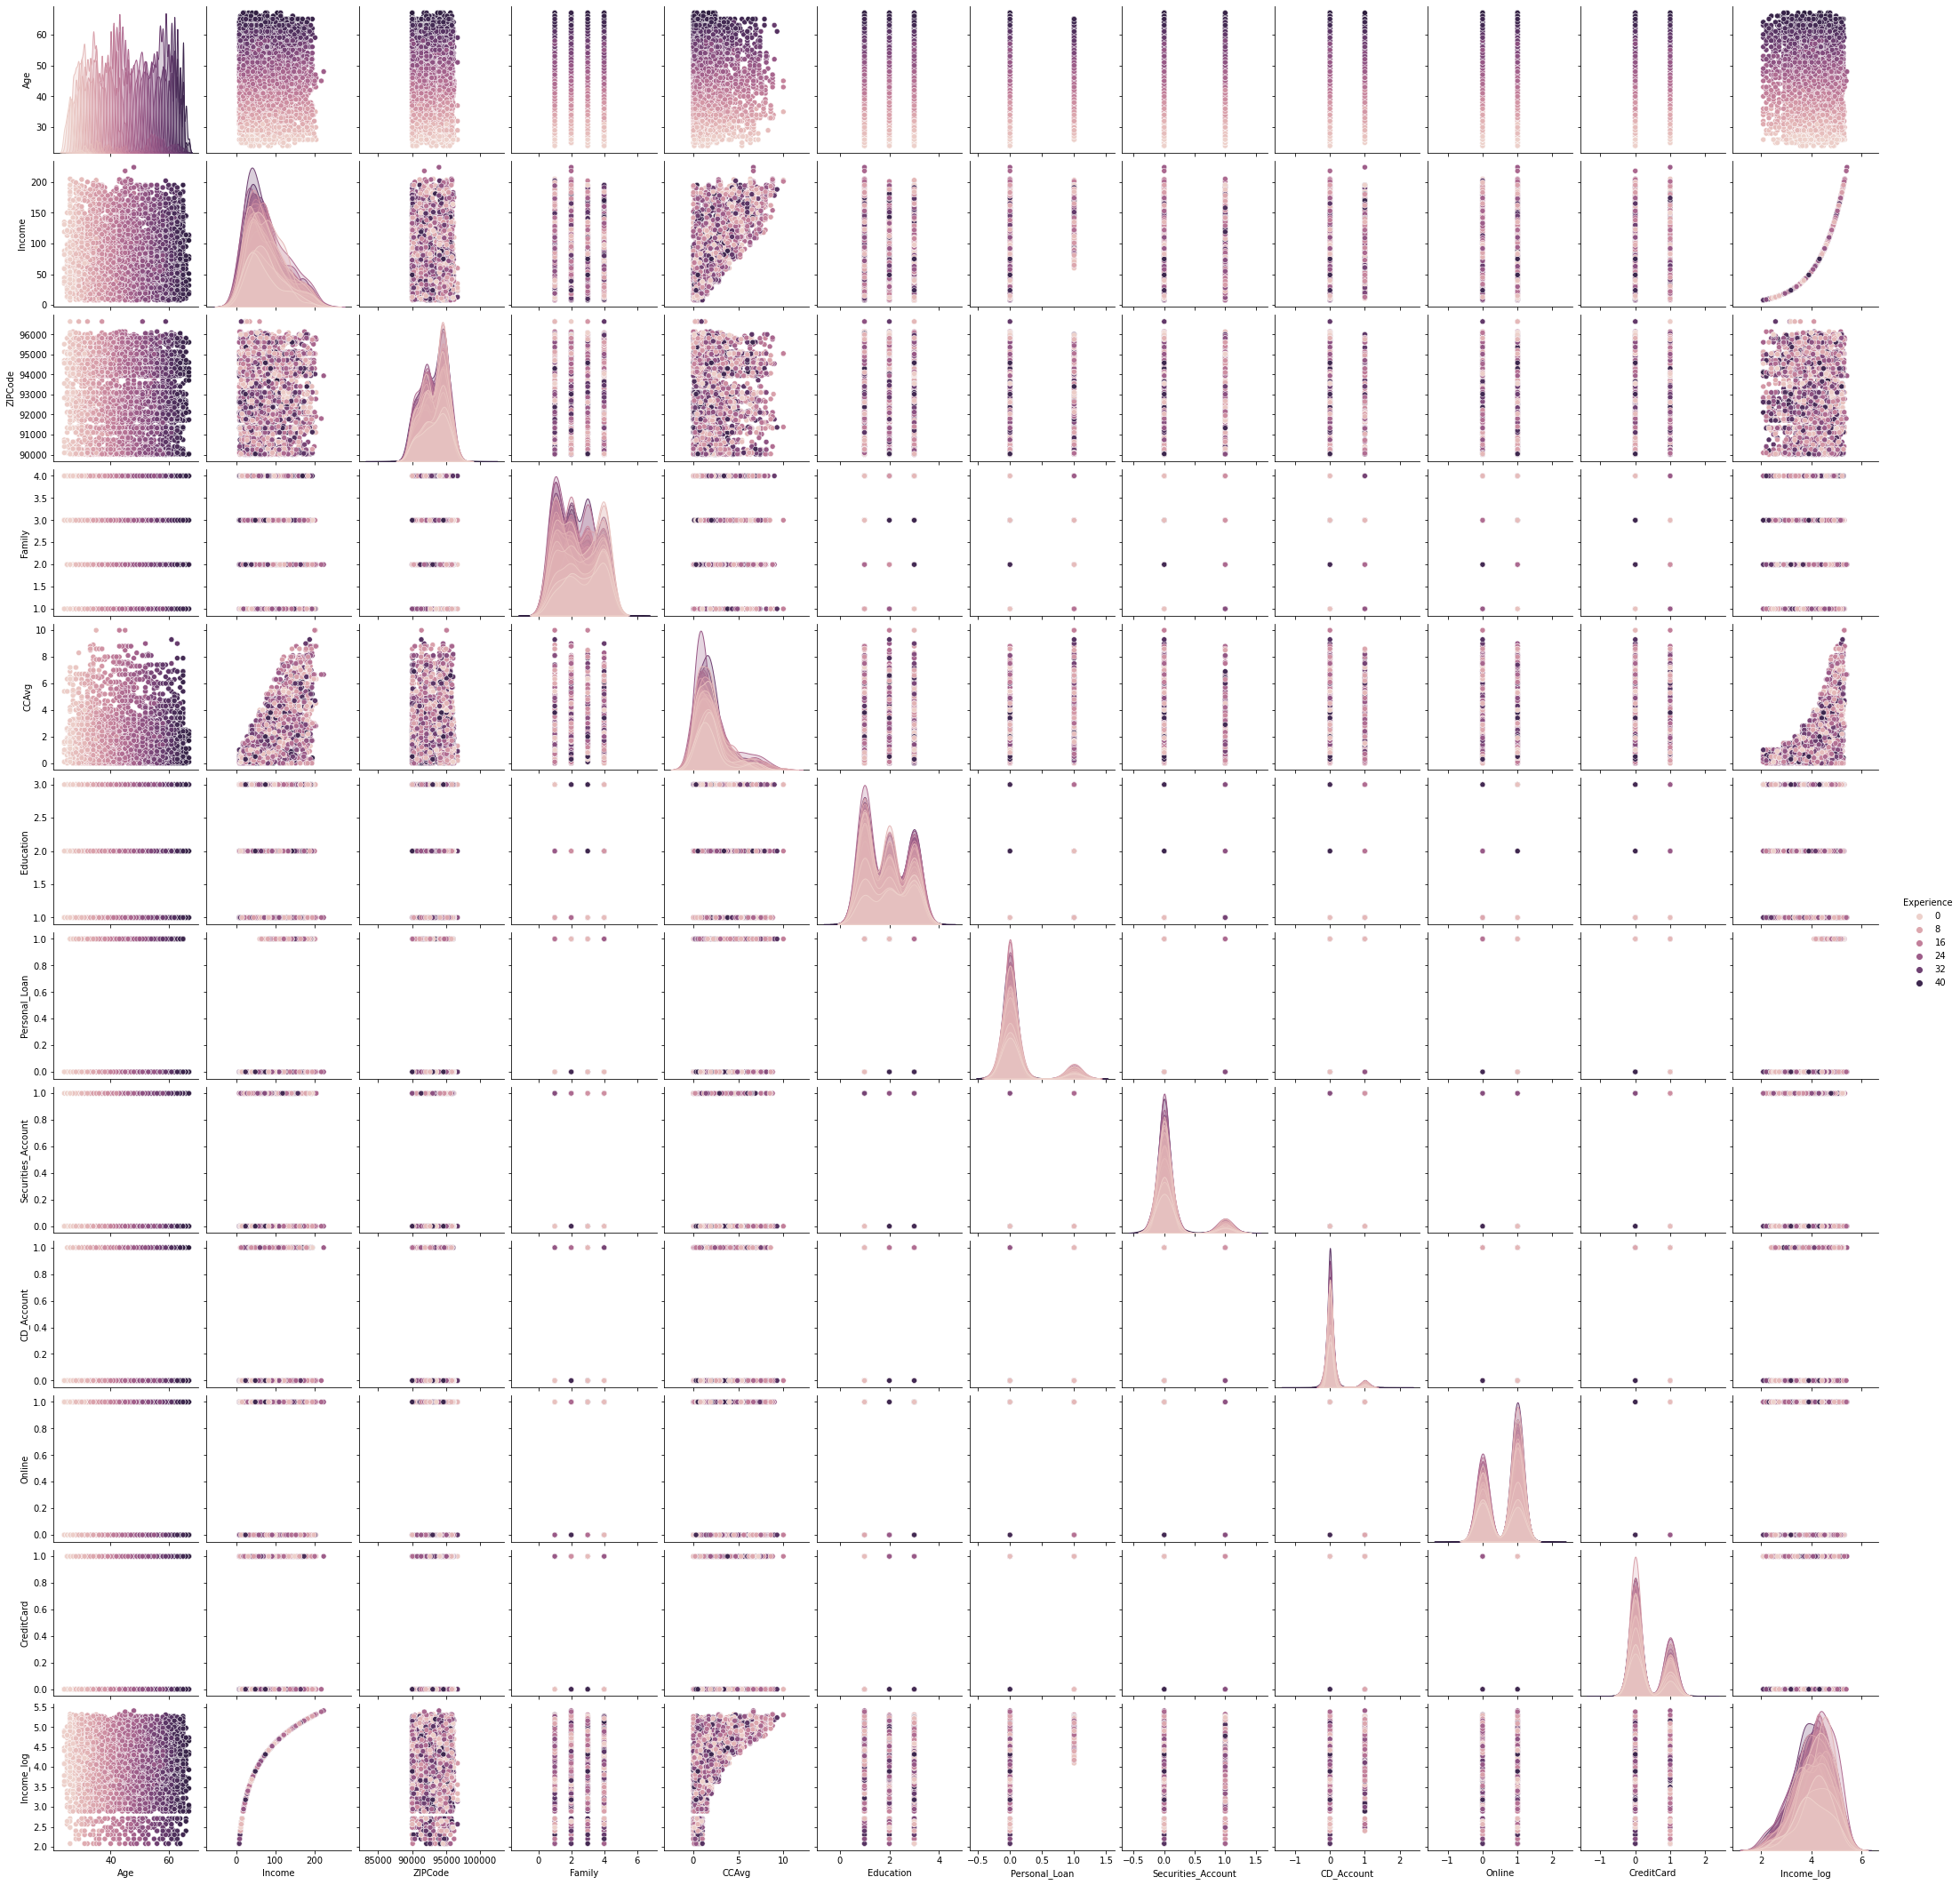

<IPython.core.display.Javascript object>

In [41]:
sns.pairplot(data=df, hue="Experience")
plt.show()

In [42]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,3.891820
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,3.526361
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,2.397895
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,4.605170
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,3.806662


<IPython.core.display.Javascript object>

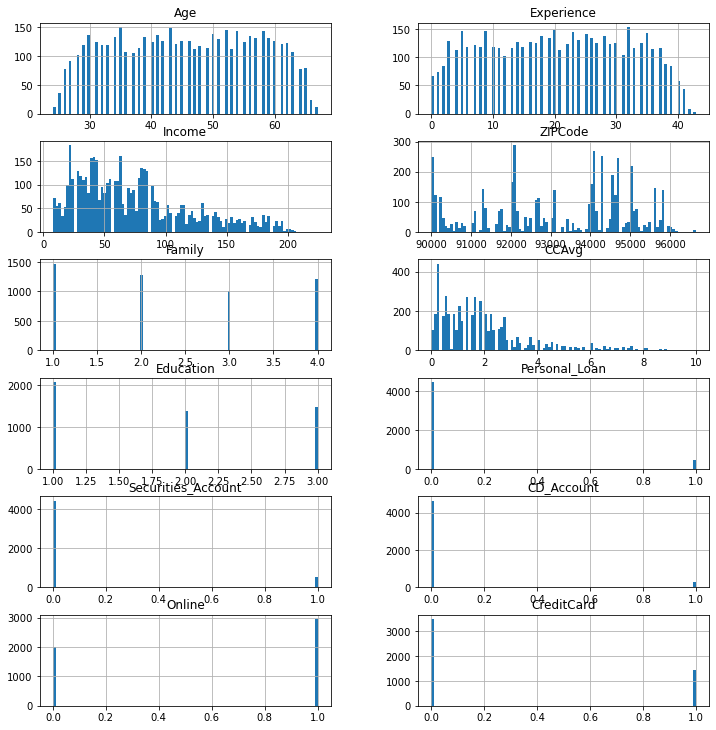

<IPython.core.display.Javascript object>

In [43]:
columns = list(df)[0:-1]  # Excluding Outcome column which has only
df[columns].hist(stacked=False, bins=100, figsize=(12, 30), layout=(14, 2))

In [44]:
df.corr()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log
Age,1.000000,0.994101,-0.058006,-0.030790,-0.039279,-0.050879,0.046222,-0.014204,0.000496,0.003261,0.013542,0.007496,-0.059096
Experience,0.994101,1.000000,-0.049245,-0.030525,-0.045610,-0.048939,0.018243,-0.014121,-0.000457,0.005450,0.013518,0.008876,-0.052617
Income,-0.058006,-0.049245,1.000000,-0.029076,-0.155666,0.646178,-0.187992,0.504228,-0.002327,0.170171,0.014433,-0.004493,0.930435
ZIPCode,-0.030790,-0.030525,-0.029076,1.000000,0.026883,-0.010614,-0.008165,-0.002848,0.001013,0.021881,0.031030,0.023778,-0.028680
Family,-0.039279,-0.045610,-0.155666,0.026883,1.000000,-0.107230,0.064032,0.063088,0.020155,0.015274,0.008466,0.012905,-0.120491
CCAvg,-0.050879,-0.048939,0.646178,-0.010614,-0.107230,1.000000,-0.133939,0.369388,0.012477,0.137587,-0.003476,-0.007377,0.592014
Education,0.046222,0.018243,-0.187992,-0.008165,0.064032,-0.133939,1.000000,0.138339,-0.007508,0.014639,-0.013932,-0.012604,-0.163965
Personal_Loan,-0.014204,-0.014121,0.504228,-0.002848,0.063088,0.369388,0.138339,1.000000,0.022216,0.315769,0.006175,0.002776,0.405971
Securities_Account,0.000496,-0.000457,-0.002327,0.001013,0.020155,0.012477,-0.007508,0.022216,1.000000,0.319056,0.016101,-0.017030,0.001394
CD_Account,0.003261,0.005450,0.170171,0.021881,0.015274,0.137587,0.014639,0.315769,0.319056,1.000000,0.176768,0.280151,0.133428


<IPython.core.display.Javascript object>

### EDA Observations go here

## LR Here

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [46]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [47]:
X = df.drop(["Personal_Loan", "Income_log"], axis=1)
Y = df["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [50]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [80]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard
coef,-0.13347,0.138272,0.053809,-0.000103,0.707543,0.103747,1.706998,-0.526787,3.258865,-0.737375,-0.967881


<IPython.core.display.Javascript object>

Coeffiecient Interpretations: 
* Expericence, Education, Income, CD_Account & CCAvg are postive an increase in these will make it more likely someone being more likely to take out a loan
* Age, Zip Code, Securities Account, Online & Credit Card are negative and make it less likely that someone will take out a personal loan

In [81]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard
Odds,0.875054,1.148288,1.055283,0.999897,2.029000,1.109320,5.512390,0.590499,26.019982,0.478368,0.379887
Change_odd%,-12.494619,14.828820,5.528280,-0.010258,102.899994,10.931984,451.238955,-40.950103,2501.998176,-52.163223,-62.011292


<IPython.core.display.Javascript object>

Interpretations: 
* a single unit change in age will decrease the chances of someone taking out a loan by .87 times or 12.49%
* a single unit change in experience will increase the cahnce of someone taking out a loan by 1.14 times or 14.82%
* a single unit change in Income will increase the chances of someone taking out a loan by 1.05 times or 5.5%
* a single unit change in Family will increase the chances of someone taking out a loan by 2.02 times or 102.89%
* a single unit change in Education will increase the chances of someone taking out a loan by 5.5 times or 451.23% - we should focus here
* a single unit change in CD Account will lead to an increase chance someone takes out a loan by 26 times or 2500%

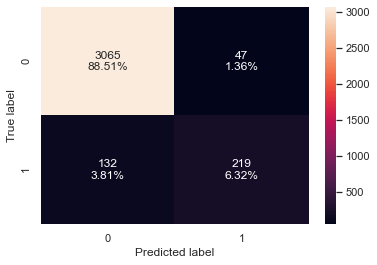

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [85]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.948311,0.623932,0.823308,0.709887


<IPython.core.display.Javascript object>

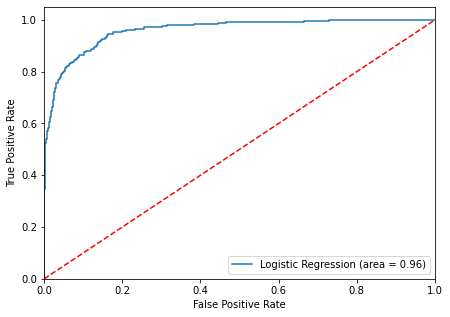

<IPython.core.display.Javascript object>

In [53]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("")
plt.legend(loc="lower right")
plt.show()

In [88]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.060169411039458776


<IPython.core.display.Javascript object>

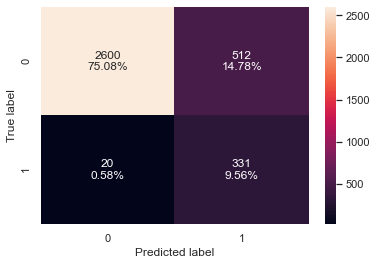

<IPython.core.display.Javascript object>

In [89]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [90]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.846376,0.94302,0.392645,0.554439


<IPython.core.display.Javascript object>

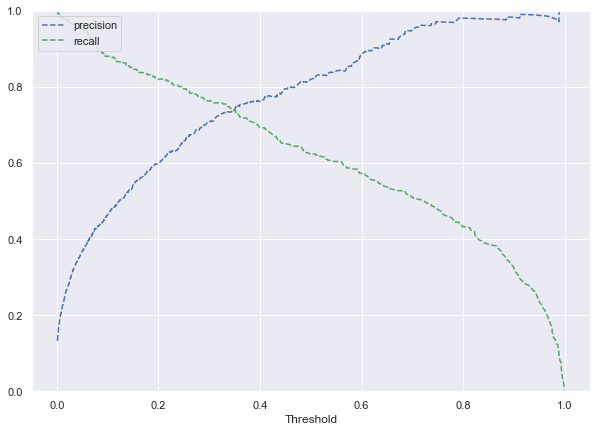

<IPython.core.display.Javascript object>

In [91]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* a threshhold around 2.7 looks to provide better recall and good precision

In [96]:
# setting the threshold
optimal_threshold_curve = 0.27

<IPython.core.display.Javascript object>

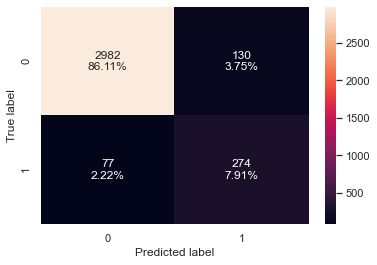

<IPython.core.display.Javascript object>

In [97]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [98]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940225,0.780627,0.678218,0.725828


<IPython.core.display.Javascript object>

In [109]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.23 Threshold",
    "Logistic Regression-0.27 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.23 Threshold,Logistic Regression-0.27 Threshold
Accuracy,0.948311,0.846376,0.940225
Recall,0.623932,0.943020,0.780627
Precision,0.823308,0.392645,0.678218
F1,0.709887,0.554439,0.725828


<IPython.core.display.Javascript object>

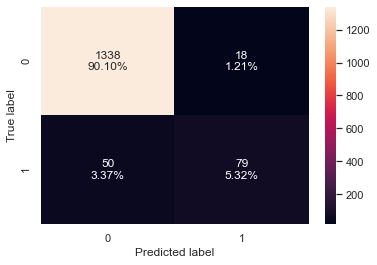

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [102]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.954209,0.612403,0.814433,0.699115


<IPython.core.display.Javascript object>

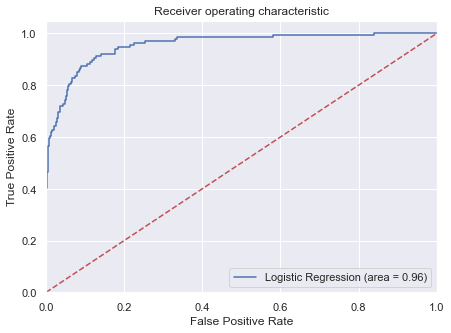

<IPython.core.display.Javascript object>

In [103]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

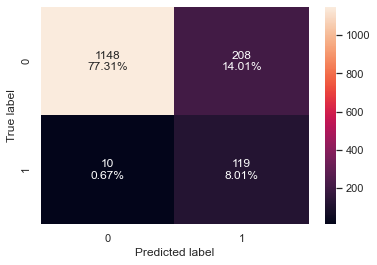

<IPython.core.display.Javascript object>

In [104]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [105]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.853199,0.922481,0.363914,0.52193


<IPython.core.display.Javascript object>

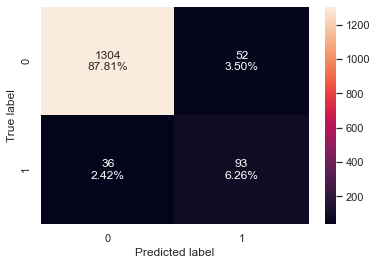

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [107]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.940741,0.72093,0.641379,0.678832


<IPython.core.display.Javascript object>

In [110]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.23 Threshold",
    "Logistic Regression-0.27 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.23 Threshold,Logistic Regression-0.27 Threshold
Accuracy,0.948311,0.846376,0.940225
Recall,0.623932,0.943020,0.780627
Precision,0.823308,0.392645,0.678218
F1,0.709887,0.554439,0.725828


<IPython.core.display.Javascript object>

In [111]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.32 Threshold,Logistic Regression-0.34 Threshold
Accuracy,0.954209,0.853199,0.940741
Recall,0.612403,0.922481,0.720930
Precision,0.814433,0.363914,0.641379
F1,0.699115,0.521930,0.678832


<IPython.core.display.Javascript object>

### LR conclusion 
* by changing the threshold to .27 we are able to achieve a recall of .72 but have an accuracy of .94

In [112]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.898643
1    0.101357
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.913131
1    0.086869
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Building the Decision Tree Model

In [113]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [114]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [117]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [118]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

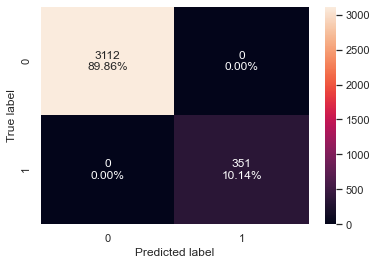

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(model, X_train, y_train)

In [120]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.978451,0.821705,0.921739,0.868852


<IPython.core.display.Javascript object>

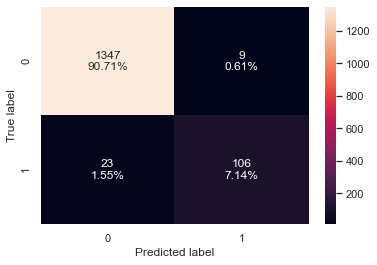

<IPython.core.display.Javascript object>

In [121]:
confusion_matrix_sklearn(model, X_test, y_test)

In [54]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

NameError: name 'feature_names' is not defined

<Figure size 1440x2160 with 0 Axes>

<IPython.core.display.Javascript object>

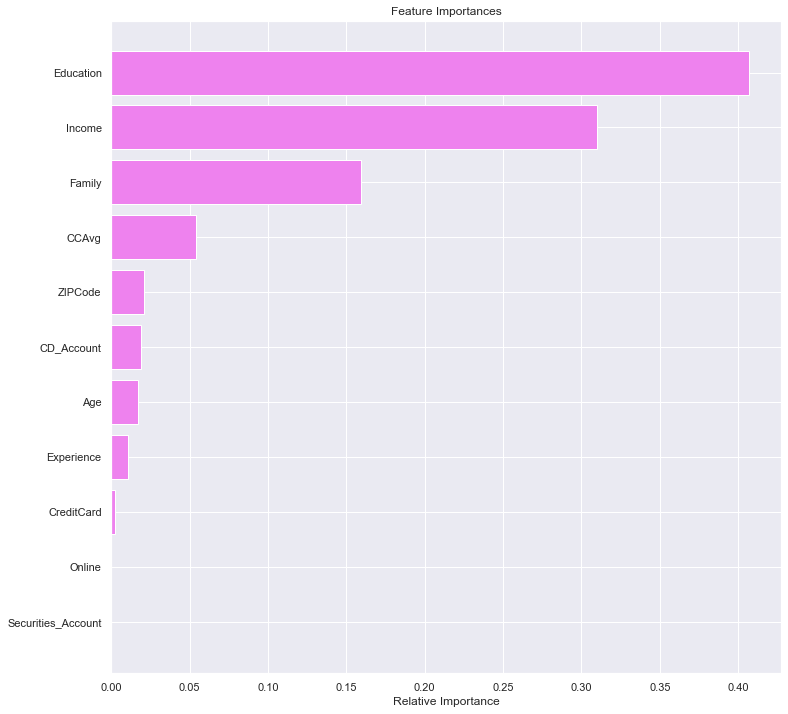

<IPython.core.display.Javascript object>

In [124]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [125]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

In [126]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

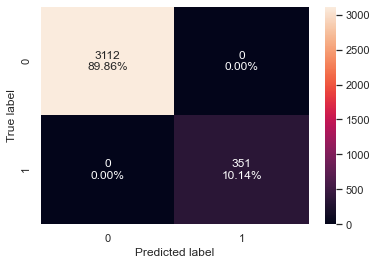

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [128]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.979125,0.837209,0.915254,0.874494


<IPython.core.display.Javascript object>

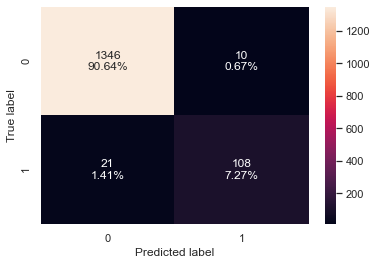

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(estimator, X_test, y_test)

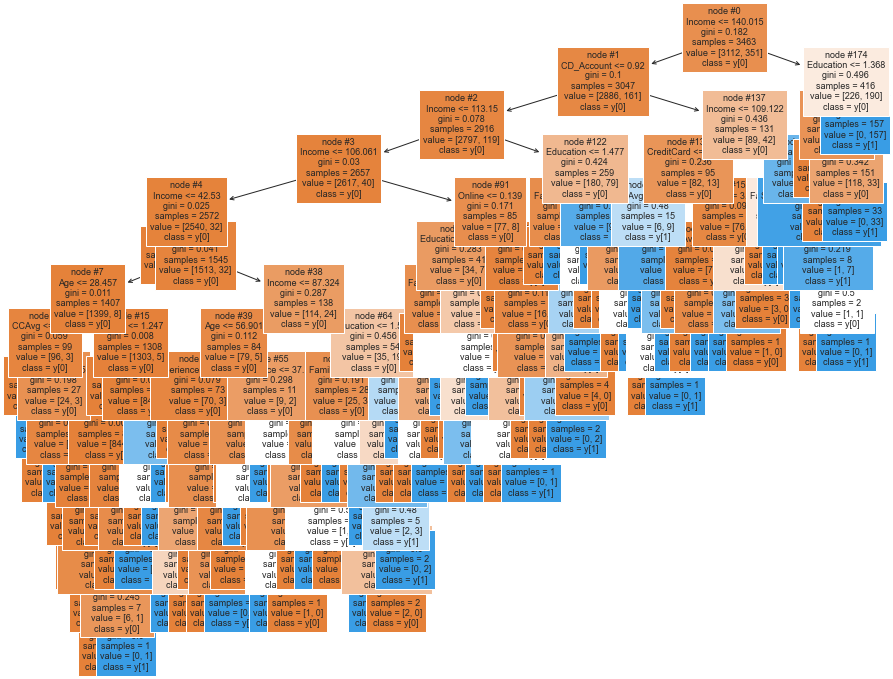

<IPython.core.display.Javascript object>

In [130]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [131]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

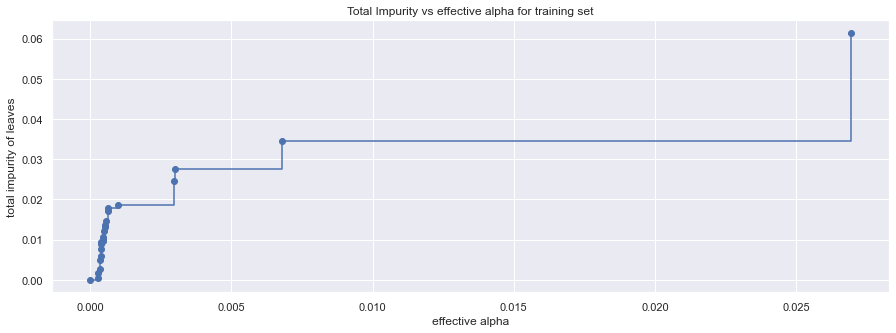

<IPython.core.display.Javascript object>

In [132]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [135]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06035802915966258


<IPython.core.display.Javascript object>

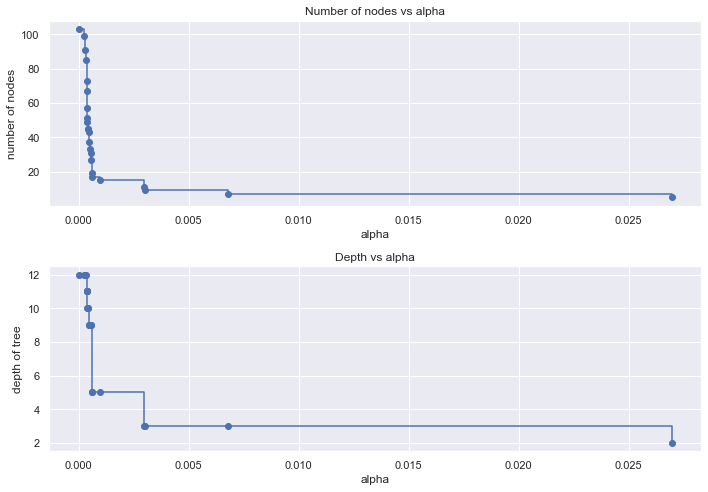

<IPython.core.display.Javascript object>

In [139]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [140]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [141]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

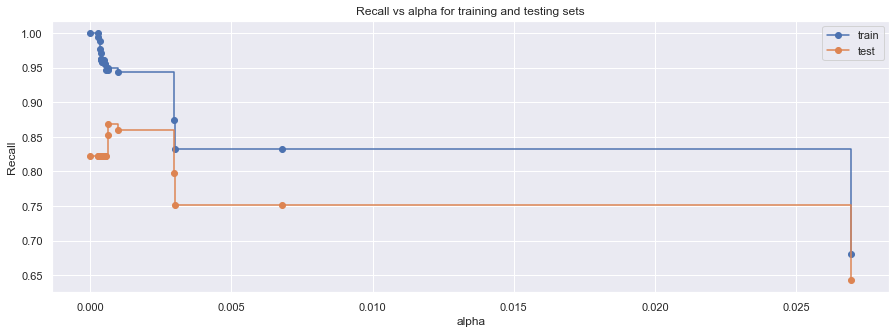

<IPython.core.display.Javascript object>

In [142]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [143]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006151464339706426, random_state=1)


<IPython.core.display.Javascript object>

In [144]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.989316,0.948718,0.946023,0.947368


<IPython.core.display.Javascript object>

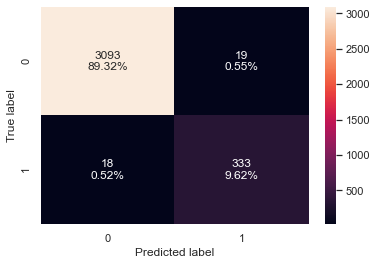

<IPython.core.display.Javascript object>

In [145]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [146]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.981145,0.868217,0.910569,0.888889


<IPython.core.display.Javascript object>

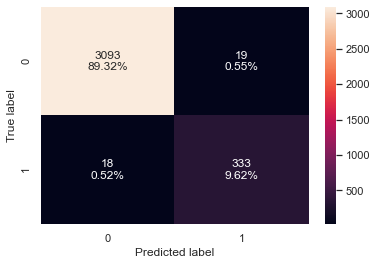

<IPython.core.display.Javascript object>

In [147]:
confusion_matrix_sklearn(best_model, X_train, y_train)

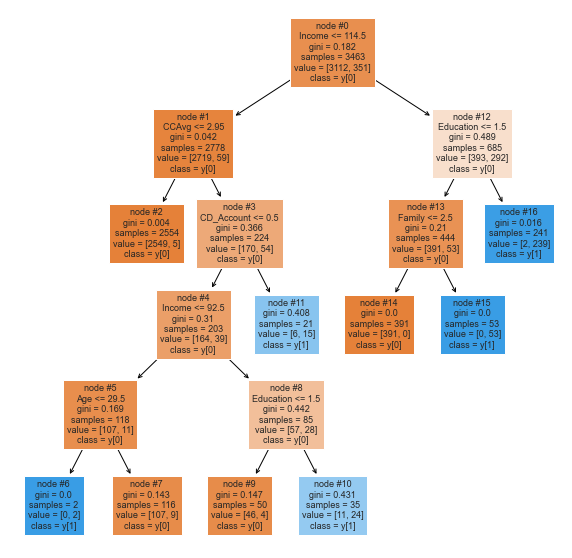

<IPython.core.display.Javascript object>

In [148]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [150]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.444154
Income              0.326399
Family              0.163974
CCAvg               0.041367
CD_Account          0.018230
Age                 0.005877
Experience          0.000000
ZIPCode             0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

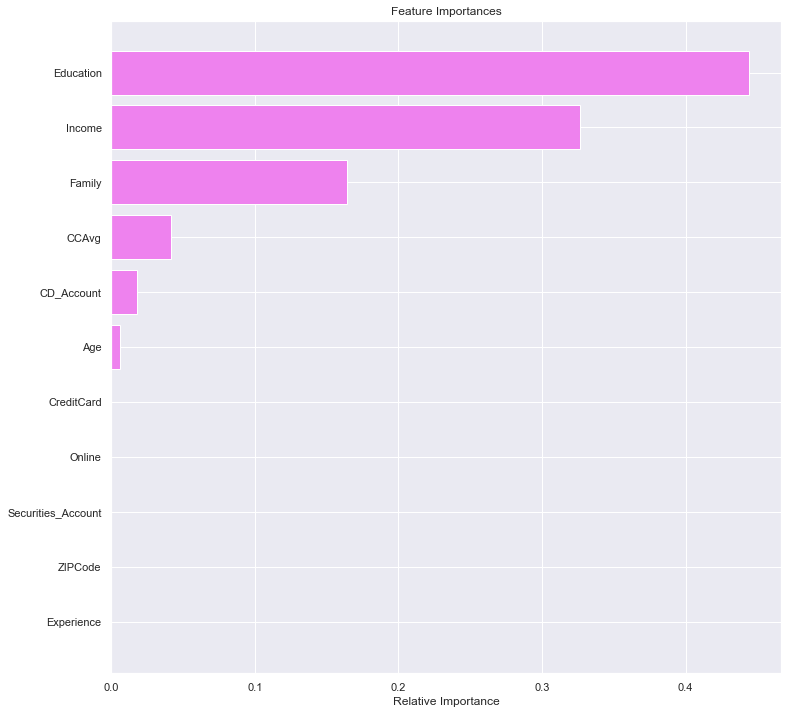

<IPython.core.display.Javascript object>

In [151]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [152]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.989316
Recall,1.0,1.0,0.948718
Precision,1.0,1.0,0.946023
F1,1.0,1.0,0.947368


<IPython.core.display.Javascript object>

In [153]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.978451,0.979125,0.981145
Recall,0.821705,0.837209,0.868217
Precision,0.921739,0.915254,0.910569
F1,0.868852,0.874494,0.888889


<IPython.core.display.Javascript object>

## Business Insights

* Education, Income and Family are the most important features to see if someone becomes a borrower
* Experience, Zip Code, Securities Account, Online and CCd make almost no difference
* Age makes a very small difference
* Higher Education, Income and Family should lead to higher chance of a customer taking out a loan. 
